In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images[0].shape

(28, 28)

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images/255.0, test_images/255.0

In [4]:
valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, 
                                                                        test_labels, 
                                                                        test_size=0.2, 
                                                                        shuffle=True)

In [ ]:
len(valid_images), len(test_images)

(8000, 2000)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1413 - accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0446 - accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0140 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0105 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 57s 31m

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0343 - accuracy: 0.9910


In [ ]:
test_accuracy

0.9909999966621399

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
inputs = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)(inputs)
pool1 = layers.MaxPooling2D(padding='same')(conv1)
conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)(pool1)
pool2 = layers.MaxPooling2D(padding='same')(conv2)
conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)(pool2)
pool3 = layers.MaxPooling2D(padding='same')(conv3)
pool3_flat = layers.Flatten()(pool3)
dense4 = layers.Dense(256, activation=tf.nn.relu)(pool3_flat)
drop4 = layers.Dropout(rate=0.2)(dense4)
logits = layers.Dense(units=10, activation='softmax')(drop4)
model = Model(inputs=inputs, outputs=logits)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 128)         0   

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1264 - accuracy: 0.9602
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9908
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0151 - accuracy: 0.9952
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9959
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - accuracy: 0.9956
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0101 - accuracy: 0.9969
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.009

In [5]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = layers.Conv2D(filters=32, kernel_size= [3, 3], padding='same', activation=tf.nn.relu)
        self.pool1 = layers.MaxPooling2D(padding='same')
        self.conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)
        self.pool2 = layers.MaxPooling2D(padding='same')
        self.conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)
        self.conv3_flat = layers.Flatten()
        self.dense4 = layers.Dense(256, activation=tf.nn.relu)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, activation='softmax')

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.conv3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

        return net

model = MNISTModel()
temp_input = layers.Input(shape=(28, 28, 1))
model(temp_input)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data = (valid_images, valid_labels), epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def display(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

    plt.show()

display(hist)

NameError: ignored

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200
                 )

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

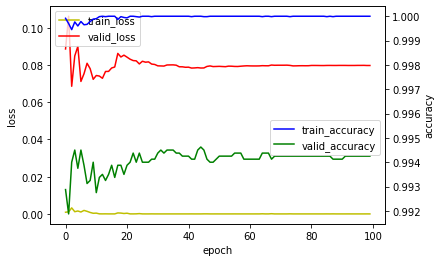

In [ ]:
display(hist)

In [ ]:
!nvidia-smi

Fri Jul 23 01:13:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    30W /  70W |   1246MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = '/content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리'
model_file_path = f'{MODEL_SAVE_FOLDER_PATH}/mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_file_path,
                                monitor='val_accuracy',
                                save_weights_only=True,
                                verbose=1,
                                save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/100
300/300 [==============================] - 6s 19ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0323 - val_accuracy: 0.9895

Epoch 00001: val_accuracy improved from -inf to 0.98950, saving model to /content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-1-0.03226-0.98950.hdf5
Epoch 2/100
300/300 [==============================] - 5s 18ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0260 - val_accuracy: 0.9908

Epoch 00002: val_accuracy improved from 0.98950 to 0.99075, saving model to /content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-2-0.02597-0.99075.hdf5
Epoch 3/100
300/300 [==============================] - 6s 19ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0244 - val_accuracy: 0.9919

Epoch 00003: val_accuracy improved from 0.99075 to 0.99187, saving model to /content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mni

In [12]:
tf.__version__

'2.5.0'

In [13]:
saved_path = '/content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-13-0.02339-0.99488.hdf5'
model.load_weights(saved_path)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 5ms/step - loss: 0.0490 - accuracy: 0.9930


In [ ]:
pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 3.0 MB 54.4 MB/s 
     |████████████████████████████████| 454 kB 61.3 MB/s 
     |████████████████████████████████| 2.9 MB 69.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.0
    Uninstalli

In [ ]:
from tensorflow.keras.layers import BatchNormalization

class ConvBNRelu(Model):
    def __init__(self, filters, kernel_size=3, strides=(1, 1), padding='same'):
        super(ConvBNRelu, self).__init__()
        self.conv = layers.Conv2D(filters, 
                                  kernel_size=kernel_size, 
                                  strides=strides, 
                                  padding=padding, 
                                  kernel_initializer='glorot_normal'
                                  )
        self.batchnorm = BatchNormalization()

    def call(self, inputs, training=False):
        layer = self.conv(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)

        return layer


In [ ]:
class DenseBNRelu(Model):
    def __init__(self, units):
        super(DenseBNRelu, self).__init__()
        self.dense = layers.Dense(units=units, kernel_initializer='glorot_normal')
        self.batchnorm = BatchNormalization()

    def call(self, inputs, training=False):
        layer = self.dense(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)

        return layer

In [ ]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size= [3, 3], padding='valid')
        self.pool1 = layers.MaxPooling2D(padding='same')
        self.conv2 = ConvBNRelu(64, (3, 3), padding='same')
        self.pool2 = layers.MaxPooling2D(padding='same')
        self.conv3 = ConvBNRelu(128, (3, 3), padding='same')
        self.conv3_flat = layers.Flatten()
        self.dense4 = DenseBNRelu(256)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax')

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.conv3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

        return net

model = MNISTModel()
temp_input = layers.Input(shape=(28, 28, 1))
model(temp_input)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_bn_relu (ConvBNRelu)    multiple                  448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv_bn_relu_1 (ConvBNRelu)  multiple                  18752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv_bn_relu_2 (ConvBNRelu)  multiple                  74368     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_bn_relu (DenseBNRelu)  multiple                  

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
saved_path = '/content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-15-0.01582-0.99512.hdf5'
model.load_weights(saved_path)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9930


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_images = train_images.reshape(-1, 784).astype('float32')
test_images = test_images.reshape(-1, 784).astype('float32')

In [ ]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [ ]:
train_images = np.dstack([train_images]*3)
test_images = np.dstack([test_images]*3)
train_images.shape, test_images.shape

((60000, 784, 3), (10000, 784, 3))

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)
train_images.shape, test_images.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in test_images])  

train_images.shape, test_images.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, 
                                                                        test_labels, 
                                                                        test_size=0.2, 
                                                                        shuffle=True)

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
layer_dict = {layer.name : layer for layer in vgg_model.layers}
x = layer_dict['block2_pool'].output

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

In [ ]:
custom_model = Model(inputs=vgg_model.input, outputs=x)
custom_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
for layer in custom_model.layers[:7]:
    layer.trainable = False

learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

custom_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = '/content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리'
model_file_path = f'{MODEL_SAVE_FOLDER_PATH}/mnist-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_file_path,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=6)

hist = custom_model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])



Epoch 1/100
300/300 [==============================] - 10s 24ms/step - loss: 0.6488 - accuracy: 0.9217 - val_loss: 0.0466 - val_accuracy: 0.9865

Epoch 00001: val_accuracy improved from -inf to 0.98650, saving model to /content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-1-0.04658-0.98650.hdf5
Epoch 2/100
300/300 [==============================] - 7s 24ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.0333 - val_accuracy: 0.9887

Epoch 00002: val_accuracy improved from 0.98650 to 0.98875, saving model to /content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-2-0.03325-0.98875.hdf5
Epoch 3/100
300/300 [==============================] - 7s 24ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0306 - val_accuracy: 0.9904

Epoch 00003: val_accuracy improved from 0.98875 to 0.99037, saving model to /content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mn

In [ ]:
saved_path = '/content/drive/MyDrive/2021 혁신 성장/공유폴더/강의 실습/딥러닝기반 자연어 처리/mnist-5-0.02687-0.99163.hdf5'
custom_model.load_weights(saved_path)

test_loss, test_accuracy = custom_model.evaluate(test_images, test_labels)

63/63 [==============================] - 1s 7ms/step - loss: 0.0434 - accuracy: 0.9865
